In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import box
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import pandas as pd

In [2]:
hma = gpd.read_file("D:/course/data/HMA-GIS-Data-main/data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg")
rgi = gpd.read_file("D:/course/data/RGI7.0 G/hma_rgi7_merge.shp")
target_crs = hma.crs
hydro = gpd.read_file(
    "D:/course/data/HMA-GIS-Data-main/data/ground-observation/hydro_station.gpkg"
).to_crs(target_crs)

dsm_paths = [
    "D:/course/data/wrjDEM/国家青藏高原数据中心-无人机数据/24k/20231014/1_dsm/24k1014_dsm.tif",
    "D:/course/data/wrjDEM/国家青藏高原数据中心-无人机数据/24k/20240712/1_dsm/24k240712_dsm.tif",
    "D:/course/data/wrjDEM/国家青藏高原数据中心-无人机数据/KQGR/20230713/1_dsm/kqgr0713_dsm.tif",
    "D:/course/data/wrjDEM/国家青藏高原数据中心-无人机数据/KQGR/20230812/1_dsm/廓琼岗日230812_dsm.tif",
    "D:/course/data/wrjDEM/国家青藏高原数据中心-无人机数据/LAIGU/20230718/1_dsm/来古230718_dsm.tif",
    "D:/course/data/wrjDEM/国家青藏高原数据中心-无人机数据/LAIGU/20231017/1_dsm/laigu1017_dsm.tif",
    "D:/course/data/wrjDEM/国家青藏高原数据中心-无人机数据/P4/20230805/1_dsm/palung4_230805_dsm.tif",
    "D:/course/data/wrjDEM/国家青藏高原数据中心-无人机数据/P4/20231017/1_dsm/pal1016_dsm.tif"
]

In [3]:
footprints = []
for p in dsm_paths:
    glacier = p.split("/")[-4]
    with rasterio.open(p) as src:
        footprints.append({"glacier": glacier, 
                           "geometry": box(*src.bounds), 
                           "crs": src.crs})

dsm_gdf = gpd.GeoDataFrame(pd.concat(
    [gpd.GeoDataFrame([fp], geometry=[fp["geometry"]], crs=fp["crs"]).to_crs(target_crs)
     for fp in footprints], ignore_index=True))

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24120\2512978060.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dsm_display.geometry.centroid.x,
C:\Users\Administrator\AppData\Local\Temp\ipykernel_24120\2512978060.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dsm_display.geometry.centroid.y,


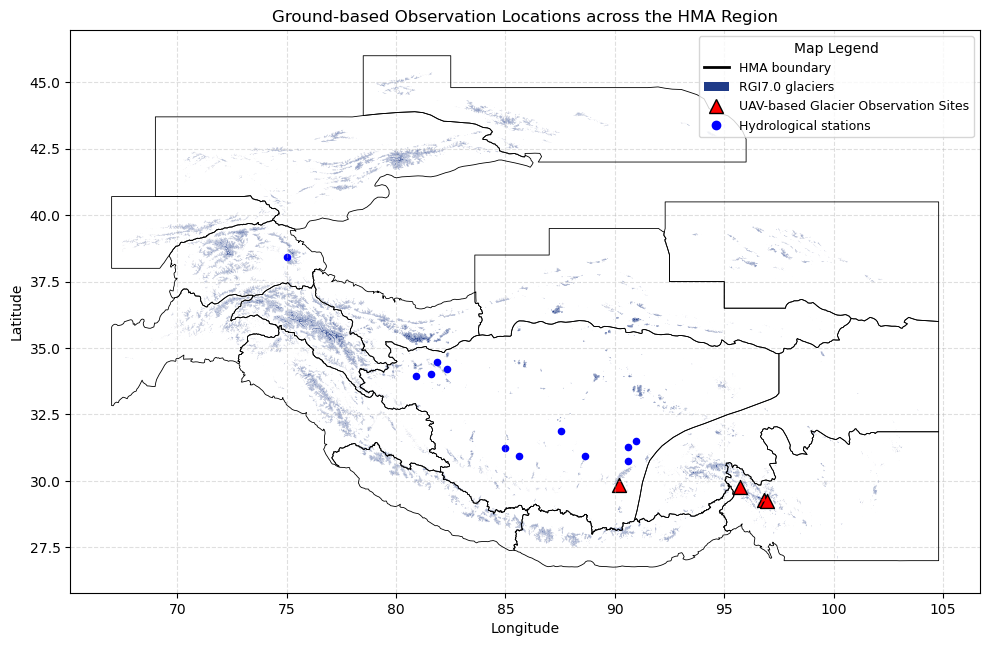

In [ ]:
dsm_display = dsm_gdf.drop_duplicates("glacier")
fig, ax = plt.subplots(figsize=(10,10))
hma.boundary.plot(ax=ax, edgecolor="black", linewidth=0.6)
rgi.plot(ax=ax, facecolor="#1f3b88", edgecolor="white", linewidth=0.05)
dsm_gdf.boundary.plot(ax=ax, edgecolor="red", linewidth=2)
ax.scatter(
    dsm_display.geometry.centroid.x,
    dsm_display.geometry.centroid.y,
    marker="^", s=100, edgecolor="black", color="red"
)

hydro.plot(ax=ax, color="blue", markersize=20)

handles = [
    Line2D([0],[0], color="black", lw=2, label="HMA boundary"),
    mpatches.Patch(facecolor="#1f3b88", label="RGI7.0 glaciers"),
    Line2D([0],[0], marker="^", linestyle="", markeredgecolor="black",
           markerfacecolor="red", markersize=10,
           label="UAV-based Glacier Observation Sites"),
    Line2D([0],[0], marker="o", linestyle="", color="blue",
           markersize=6, label="Hydrological stations")
]

ax.legend(handles=handles, title="Map Legend", loc="upper right", fontsize=9)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True, linestyle="--", alpha=0.4)
ax.set_title("Ground-based Observation Locations across the HMA Region")

plt.tight_layout()
plt.show()